### 1. Imports

In [1]:
import tweepy
import pandas    as pd
import numpy     as np
from IPython.display       import display
import matplotlib.pyplot    as plt
import seaborn             as sns
%matplotlib inline

**References**

https://github.com/D-Favari/Analise-de-Sentimentos---Twitter/blob/master/Analise%20-%20Teste.ipynb

https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

https://medium.com/analytics-vidhya/training-your-own-sentiment-analyzer-with-spacy-9b924df1514c

**You have to add your own keys here**

In [2]:
# Cliente:
CONSUMER_KEY        = ""
CONSUMER_SECRET     = ""

# Acesso:
ACCESS_TOKEN        = ""
ACCESS_SECRET       = ""

In [10]:
# API
def twitter_setup():
    # Autenticação e acesso
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Retorna API com autenticação:
    api = tweepy.API(auth)
    return api

In [11]:
extractor = twitter_setup()

# Lista de perfis a terem dados extraídos
#tweets = extractor.user_timeline(screen_name="elonmusk", count=200)
# Lista de assuntos a serem extraídos
tweets = extractor.search(input("Topic you want to analyze: "), count=100,date_since = "2015-02-07",tweet_mode='extended')

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Printa as tweets mais recentes
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.full_text)
    print()

Topic you want to analyze: unconventional gas
Number of tweets extracted: 46.

5 recent tweets:

RT @watershedallyAU: REG. interest by 17/Feb/21:
*Email: pria@planning.nsw.gov.au. *Ph: (02)9274 6164.
Prelim. Reg. Issues Assess. Bancanni…

RT @watershedallyAU: #gas #stopCSG #bancanniatrough #pondierange 
Prelim. Reg. Issues Assessment Bancannia, Pondie Range, Neckarboo and Yat…

RT @watershedallyAU: #gas #stopCSG #bancanniatrough #pondierange 
Prelim. Reg. Issues Assessment Bancannia, Pondie Range, Neckarboo and Yat…

RT @djbuck99: Don't you just love the way they re-word 
'fracking for unconventional gas' as 'TIGHT GAS' ??

Talk about being deceitful.

RT @djbuck99: Don't you just love the way they re-word 
'fracking for unconventional gas' as 'TIGHT GAS' ??

Talk about being deceitful.



In [12]:
data = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['Tweets'])

In [13]:
print(dir(tweets[0]))

print("\n")
# Exibe as informações de cada tweet
print(tweets[0].retweet_count)
print(tweets[0].retweeted)
print(tweets[0].full_text)
print(tweets[0].author.screen_name)
#print(tweets[0].retweets)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'truncated', 'user']


5
False
RT @watershedallyAU: REG. interest by 17/Feb/21:
*Email: pria@planning.nsw.gov.au. *Ph: (02)9274 6164.
Prelim. Re

In [14]:
data['Len']   = np.array([len(tweet.full_text) for tweet in tweets])
data['ID']    = np.array([(tweet.id) for tweet in tweets])
data['Date']  = np.array([(tweet.created_at) for tweet in tweets])
data['Likes'] = np.array([(tweet.favorite_count) for tweet in tweets])
data['RTs']   = np.array([(tweet.retweet_count) for tweet in tweets])
data['User']  = np.array([(tweet.author.screen_name) for tweet in tweets])
data['Location'] = np.array([(tweet.author.location) for tweet in tweets])
# Exibe 10 primeiros elementos da tabela
display(data.tail(10))

,Tweets,Len,ID,Date,Likes,RTs,User,Location
36,Unconventional Natural Gas Development and Hea...,121,1359007461202530306,2021-02-09 05:13:22,0,0,SianTsuei,
37,RESEARCHERS' CORNER: JP Nicot explains how low...,258,1358847582911496195,2021-02-08 18:38:04,1,0,Bureau3E,
38,RT @SharonKellyEsq: “The entirety of that loss...,140,1358824790182789120,2021-02-08 17:07:30,0,1,JustinMikulka,
39,“The entirety of that loss came from a $1.1B n...,293,1358821591241654273,2021-02-08 16:54:47,1,1,SharonKellyEsq,
40,RT @SadrachNirere: In order to even have the s...,140,1358782027605114882,2021-02-08 14:17:34,0,2,IsataRoseline,
41,RT @prashantruia: Spent an eventful day at Ess...,140,1358761148435156992,2021-02-08 12:54:37,0,18,tej811,Mumbai
42,In order to even have the slightest chance of ...,276,1358728895755878400,2021-02-08 10:46:27,9,2,SadrachNirere,In a Plastic Free Africa
43,‘Unconventional’ fossil fuels cover an extensi...,297,1358709474916237312,2021-02-08 09:29:17,24,4,AlAttiyahFndn,"Doha, Qatar"
44,😭 That's why we'll be engaging with all partie...,180,1358687954487640065,2021-02-08 08:03:46,0,0,Khabise_M,Inside
45,RT @prashantruia: Spent an eventful day at Ess...,140,1358574477441830912,2021-02-08 00:32:51,0,18,Ashish_Kr_Exp,"Mumbai, India"


In [15]:
data.shape

(46, 8)

### 2. Saving and reading the database

In [16]:
data.to_csv('tweets_unconventional.csv')

In [34]:
data = pd.read_csv('tweets_unconventional2.csv')

### 3. Starting the analysis

In [35]:
# Extraindo os tweets com mais likes e com mais RT

fav_max   = np.max(data['Likes'])
rt_max    = np.max(data['RTs'])

fav       = data[data.Likes == fav_max].index[0]
rt        = data[data.RTs == rt_max].index[0]

# Mais Liks:
print("O tweet com mais likes é: \n{}".format(data['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))

# Break line
print("\n")

# Mais RTs:
print("O tweet com mais RTs é: \n{}".format(data['Tweets'][rt]))
print("Número de RTs:: {}".format(rt_max))

O tweet com mais likes é: 
Spent an eventful day at Essar Oil and Gas Exploration and Production Ltd #EOGEPL facility in Raniganj, Durgapur. The company is a pioneer in producing unconventional gas, the fuel of the future in #India. https://t.co/Qm3KuQcaph
Número de likes: 102


O tweet com mais RTs é: 
RT @prashantruia: Spent an eventful day at Essar Oil and Gas Exploration and Production Ltd #EOGEPL facility in Raniganj, Durgapur. The com…
Número de RTs:: 18


<AxesSubplot:xlabel='Date'>

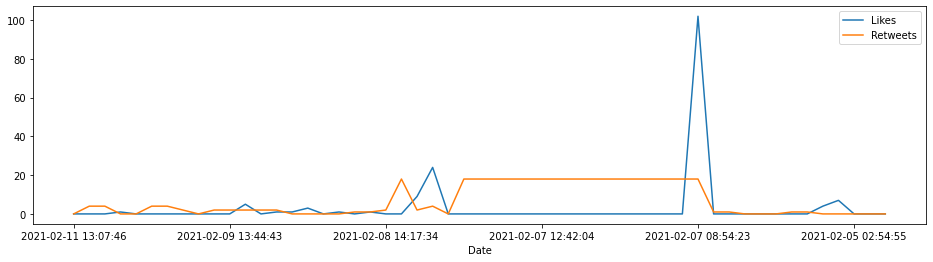

In [36]:
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True)

In [37]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    # Remover links e caracteres especiais
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
def analize_sentiment(tweet):
    # Classificar a polaridade(positivo negativo) do tweet
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [38]:
data.Tweets[15]

'😳 excuse me!?! What now? \nUnconventional gas extraction is powering #AusOpen? The methane leaking, water polluting, country destroying, community dividing @Santos? That one?😮 @AustralianOpen should have a better look at who they partner up with! #ClimateEmergency #greenwashing https://t.co/EKVQSyCi19'

In [39]:
# Adicionando mais uma coluna à tabela com os resultados obtidos acima
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])
display(data.head(20))

,Unnamed: 0,Tweets,Len,ID,Date,Likes,RTs,User,Location,SA
0,0,"Some excitement around Galilees pilot wells,no...",235,1359851623669895170,2021-02-11 13:07:46,0,0,TheLaughingCav4,NaN,-1
1,1,RT @AlAttiyahFndn: ‘Unconventional’ fossil fue...,140,1359801850334236672,2021-02-11 09:49:59,0,4,h_alatteya,دولة قطر,-1
2,2,RT @AlAttiyahFndn: ‘Unconventional’ fossil fue...,140,1359578882949660676,2021-02-10 19:04:00,0,4,ALIZALAT,Cairo - London - Doha,-1
3,3,@frankaaro @khd Trolig: Unconventional oil con...,258,1359547265074008069,2021-02-10 16:58:21,1,0,KPmarius,"Randaberg, Norge",-1
4,4,China has the world’s second-largest technical...,279,1359514977695105027,2021-02-10 14:50:03,0,0,jcbcol,Colombia,-1
5,5,RT @AlAttiyahFndn: ‘Unconventional’ fossil fue...,140,1359458536200224769,2021-02-10 11:05:47,0,4,wadha34560332,"London, England",-1
6,6,RT @AlAttiyahFndn: ‘Unconventional’ fossil fue...,140,1359446194469154819,2021-02-10 10:16:44,0,4,atteya_wadha,دولة قطر,-1
7,7,RT @GeorgeBender68: @Tony_Burke @earthma23 I w...,140,1359284606613135363,2021-02-09 23:34:39,0,2,ghengis5410,NaN,-1
8,8,@CurmudgeonCD21 @Ardnas02818675 @RepStefanik T...,313,1359241914449469441,2021-02-09 20:45:00,0,0,danintheoutback,Australia,1
9,9,RT @LongFinance: China's CNOOC Ltd. said it wi...,140,1359151030307614734,2021-02-09 14:43:52,0,2,JCharrison,"London, UK",1


In [40]:
# Classificando os tweets
positive = [tweet for index, tweet in enumerate(data["Tweets"]) if data['SA'][index] > 0]
neutral  = [tweet for index, tweet in enumerate(data["Tweets"]) if data['SA'][index] == 0]
negative = [tweet for index, tweet in enumerate(data["Tweets"]) if data['SA'][index] < 0]

# Exibindo as porcentagens
print("Porcentagem de tweets positivos: {}%".format(len(positive)*100/len(data['Tweets'])))
print("Porcentagem de tweets neutros: {}%".format(len(neutral)*100/len(data['Tweets'])))
print("Porcentagem de tweets negativos: {}%".format(len(negative)*100/len(data['Tweets'])))

Porcentagem de tweets positivos: 26.41509433962264%
Porcentagem de tweets neutros: 15.09433962264151%
Porcentagem de tweets negativos: 58.490566037735846%


### 4. Checking polarity and subjectivity

In [41]:
def clean(text):
    # Removal of certain words and symbols
    # Re.sub = substitute any pattern we find that we want removed
    # Find characters with @
    # Look for characters [A-Z] & [a-z] & [0-9]
    # r tells python the expression is a raw string

    # Remove @
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Replace with Empty String

    # Remove #
    text = re.sub(r'#', '', text)

    # Remove Re-Tweets followed by one or more spaces
    text = re.sub('RT[\s]+', '', text)

    # Remove Hyperlinks from tweets followed by one or more white spaces
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = text.lower()
    return text

data['Tweets'] = data['Tweets'].apply(clean)

In [42]:
# Subjectivity & Polarity

# Create a function to get the subjectivity
# How subjective or opinionated a text is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
# How positive or negative the a text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# Create two new columns (Subjectivity & Polarity)
data['Subjectivity'] = data['Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Tweets'].apply(getPolarity)


# Show the updated dataframe with the new columns
data.head()

,Unnamed: 0,Tweets,Len,ID,Date,Likes,RTs,User,Location,SA,Subjectivity,Polarity
0,0,"some excitement around galilees pilot wells,no...",235,1359851623669895170,2021-02-11 13:07:46,0,0,TheLaughingCav4,NaN,-1,0.602083,-0.189583
1,1,: ‘unconventional’ fossil fuels cover an exten...,140,1359801850334236672,2021-02-11 09:49:59,0,4,h_alatteya,دولة قطر,-1,0.587302,-0.195238
2,2,: ‘unconventional’ fossil fuels cover an exten...,140,1359578882949660676,2021-02-10 19:04:00,0,4,ALIZALAT,Cairo - London - Doha,-1,0.587302,-0.195238
3,3,trolig: unconventional oil consists of a wid...,258,1359547265074008069,2021-02-10 16:58:21,1,0,KPmarius,"Randaberg, Norge",-1,0.455357,-0.177976
4,4,china has the world’s second-largest technical...,279,1359514977695105027,2021-02-10 14:50:03,0,0,jcbcol,Colombia,-1,0.346429,-0.044643


In [43]:
from wordcloud import WordCloud

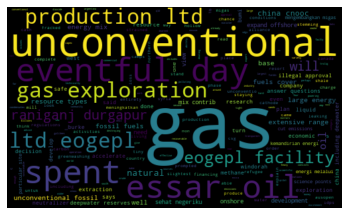

In [44]:
# Plot Word Cloud
all_words = ' '.join( [twts for twts in data['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [45]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)
data.head()

,Unnamed: 0,Tweets,Len,ID,Date,Likes,RTs,User,Location,SA,Subjectivity,Polarity,Analysis
0,0,"some excitement around galilees pilot wells,no...",235,1359851623669895170,2021-02-11 13:07:46,0,0,TheLaughingCav4,NaN,-1,0.602083,-0.189583,Negative
1,1,: ‘unconventional’ fossil fuels cover an exten...,140,1359801850334236672,2021-02-11 09:49:59,0,4,h_alatteya,دولة قطر,-1,0.587302,-0.195238,Negative
2,2,: ‘unconventional’ fossil fuels cover an exten...,140,1359578882949660676,2021-02-10 19:04:00,0,4,ALIZALAT,Cairo - London - Doha,-1,0.587302,-0.195238,Negative
3,3,trolig: unconventional oil consists of a wid...,258,1359547265074008069,2021-02-10 16:58:21,1,0,KPmarius,"Randaberg, Norge",-1,0.455357,-0.177976,Negative
4,4,china has the world’s second-largest technical...,279,1359514977695105027,2021-02-10 14:50:03,0,0,jcbcol,Colombia,-1,0.346429,-0.044643,Negative


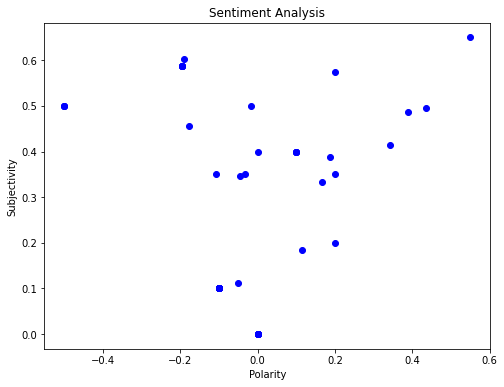

In [46]:
plt.figure(figsize=(8, 6))
for i in range(0, data.shape[0]):
    # Plot Tweets
    plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color='Blue')

# Label Plot
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Display Plot
plt.show()

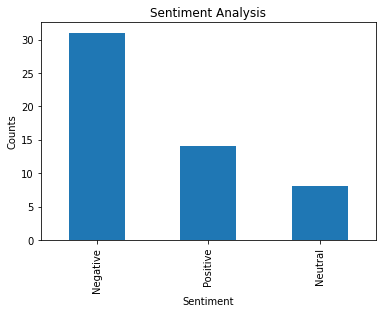

In [47]:
# Show the value counts
data['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

# Plot as a BarPlot
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [48]:
from wordcloud import WordCloud,STOPWORDS
def plot_wordcloud(df):
    words = '' 
    stopwords = set(STOPWORDS)  
    for val in df.values:  
        val = str(val) 
        tokens = val.split()
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color = "white", 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words)                     
    plt.figure(figsize = (10,8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

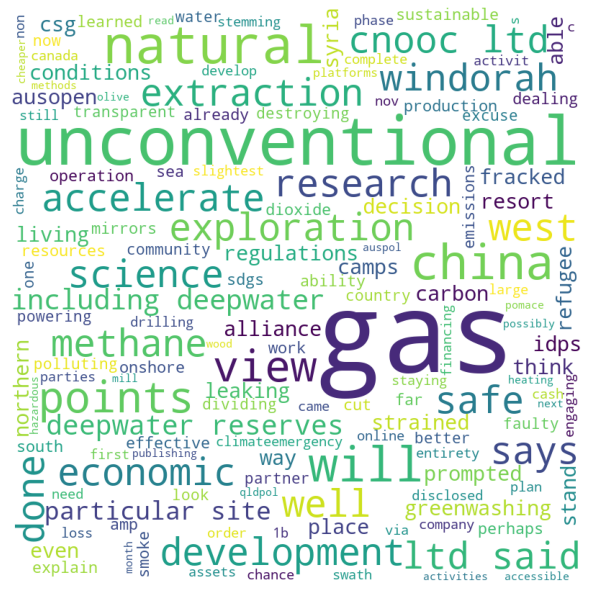

In [49]:
plot_wordcloud(data["Tweets"].where(data["Analysis"]=="Positive").dropna())

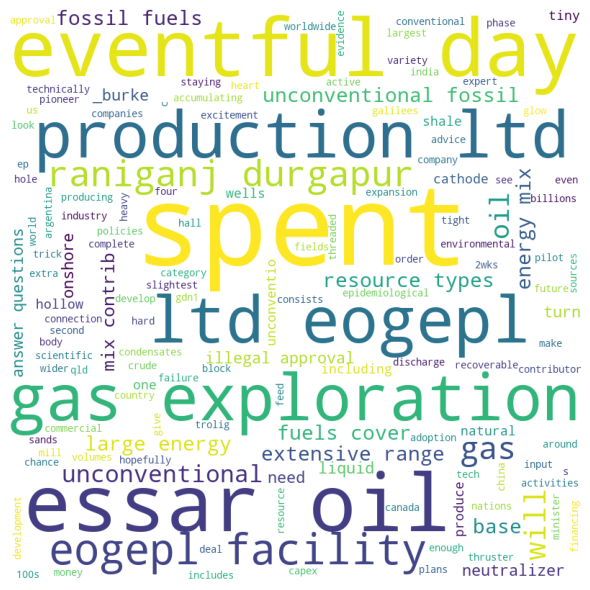

In [50]:
plot_wordcloud(data["Tweets"].where(data["Analysis"]=="Negative").dropna())